# <center> THE SPARKS FOUNDATION

# <center>TASK - 2

#   <center>                                                                             Name: Kruti Soni


# <center>```Task : Data Science & Business Analytics -Unsupervised Machine Learning```

# <center>Dataset:Iris

# Problem Statement

To predict the optimum number of clusters
and represent it visually.

# Importing required libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

# Loading the dataset

In [2]:
iris_dataset = pd.read_csv('C:/Users/genz/Documents/Data Analysis/Iris.csv')

In [3]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_dataset.drop(["Id","Species"],axis = 1,inplace = True)

In [5]:
iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_dataset.shape

(150, 4)

#### **As we can see that there are `150 rows` and `4 columns` in the given dataset.**

# <center> Data Exploration

In [7]:
iris_dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [28]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  146 non-null    float64
 1   SepalWidthCm   146 non-null    float64
 2   PetalLengthCm  146 non-null    float64
 3   PetalWidthCm   146 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [8]:
iris_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# <center> Data Visualization

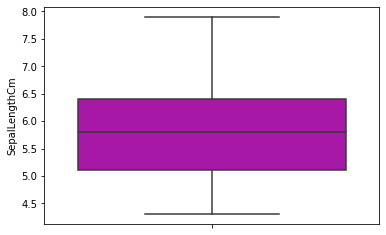

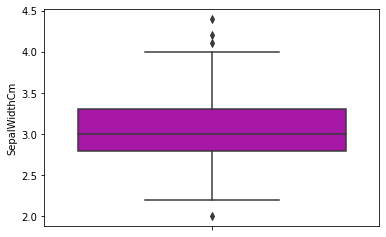

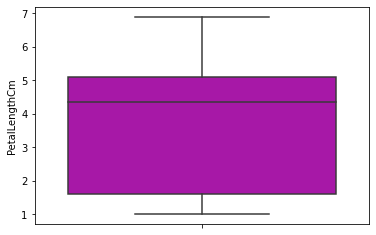

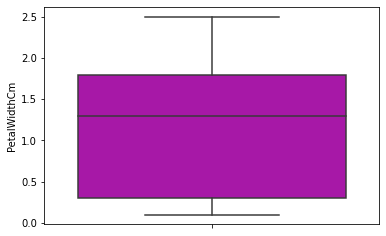

In [9]:
Box_loop = iris_dataset.columns
for i in Box_loop:
    sns.boxplot(y=iris_dataset[i],color='m')
    plt.show()

#### **As we can see that outlier is present in `sepal width`.**

# <center>Data Cleaning

# Eliminating outliers from 'sepal width' column

In [10]:
q1 = iris_dataset['SepalWidthCm'].quantile(0.25)
q3 = iris_dataset['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
iris_dataset = iris_dataset[(iris_dataset['SepalWidthCm'] >= q1-1.5*iqr) & (iris_dataset['SepalWidthCm'] <= q3+1.5*iqr)]
iris_dataset.shape 

(146, 4)

####  Boxplot for sepal width (cm) after removing `outlier` 

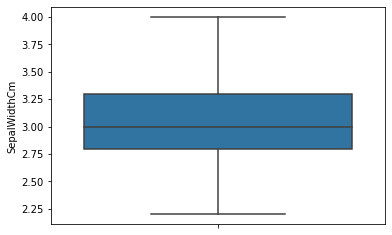

In [11]:
sns.boxplot(y=iris_dataset['SepalWidthCm'])
plt.show()

# <center> Eliminating Bias

In [12]:
# Standardizing
standard_scaler = StandardScaler()
iris_dataset_normal = standard_scaler.fit_transform(iris_dataset)

# Finding the optimal no. of cluster

In [25]:
cluster_range = range(1,25)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(iris_dataset_normal)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:25]

,num_cluster,cluster_errors
0,1,584.000000
1,2,218.934500
2,3,135.398152
3,4,110.594050
4,5,89.383596
5,6,78.146896
6,7,69.943125
7,8,59.525640
8,9,53.268053
9,10,46.291911


# <center>Ploting elbow curve to find the no. of cluster

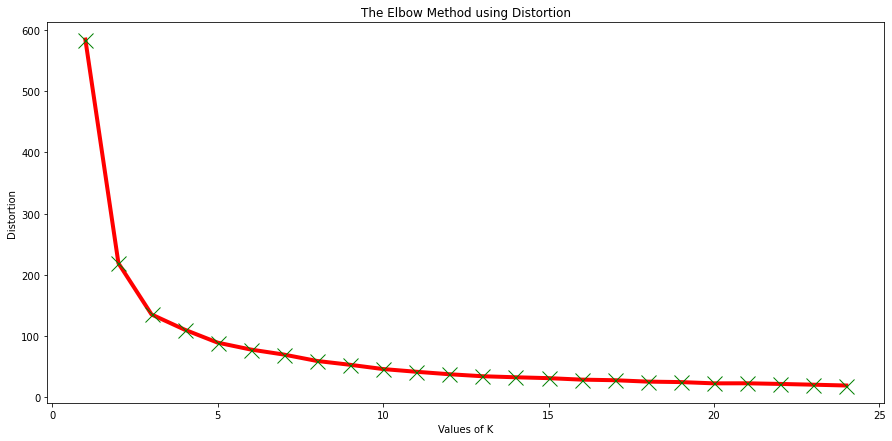

In [26]:
plt.figure(figsize=(15,7))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'x',color='red',linewidth=4,markersize=15,markeredgecolor='green') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### As we can see that why it is called ‘The elbow method’ from the above graph, the optimum clusters is where the elbow occurs.

In [15]:
# Creating object of the model and fitting it
model = KMeans(n_clusters=3, max_iter=50)
model.fit(iris_dataset)

KMeans(max_iter=50, n_clusters=3)

# <center> Cluster Analysis

In [16]:
iris_dataset.index = pd.RangeIndex(len(iris_dataset.index))
df_km = pd.concat([iris_dataset, pd.Series(model.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

In [17]:
df2 = pd.concat([pd.Series([0,1,2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth
                ], axis=1)
df2.columns = ['ClusterID','SepalLengthMeanCm','SepalWidthMeanCm','PetalLengthMeanCm',
               'PetalWidthMeanCm']
df2.head()

,ClusterID,SepalLengthMeanCm,SepalWidthMeanCm,PetalLengthMeanCm,PetalWidthMeanCm
0,0,4.976596,3.365957,1.463830,0.244681
1,1,5.916393,2.760656,4.408197,1.440984
2,2,6.850000,3.073684,5.742105,2.071053


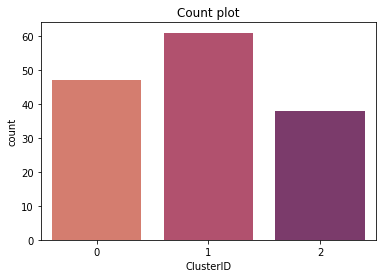

In [27]:
sns.countplot(x=df_km.ClusterID,palette="flare")
plt.title('Count plot')
plt.show()

Heirarchical clustering with full dendrogram(diagram representing a tree)

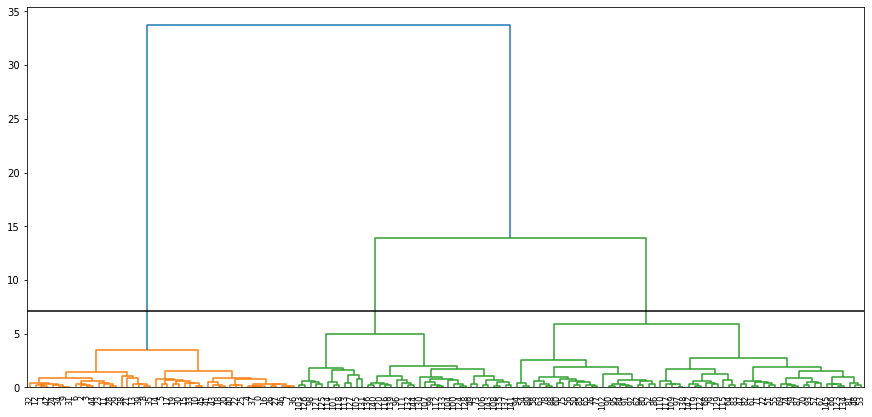

In [19]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance
dendrogram(mergings,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=200,                  # Try changing values of p
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
          )

plt.axhline(y=max_d, c='k')
plt.show()

Heirarchical clustering with full dendrogram for p equals to 50

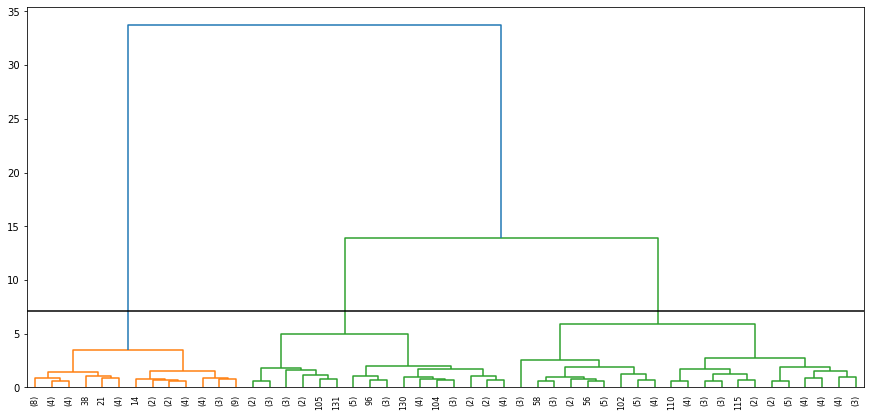

In [20]:
plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance
dendrogram(mergings,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=50,                  # Try changing values of p
           leaf_rotation=90.,      # rotates the x axis labels
           leaf_font_size=8.,      # font size for the x axis labels
          )

plt.axhline(y=max_d, c='k')
plt.show()

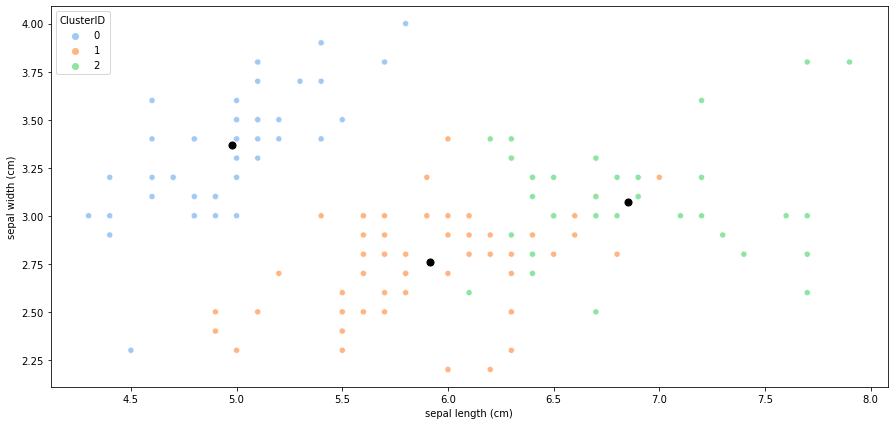

In [21]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=df_km, hue='ClusterID', palette="pastel")

# Plotting centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'Centroids')
plt.show()

### <center> Thanks for Watching!